In [1]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, output_notebook, show
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Benim amelelik
'''
path1 = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_8.xlsx'
df_8 = pd.read_excel(path1)
df_8 = df_8.head(200)

path2 = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_9.xlsx'
df_9 = pd.read_excel(path2)
df_9 = df_9.head(200)

path3 = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_10.xlsx'
df_10 = pd.read_excel(path3)
df_10 = df_10.head(200)

path4 = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_11.xlsx'
df_11 = pd.read_excel(path4)
df_11 = df_11.head(200)

path = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_12.xlsx'
df_12 = pd.read_excel(path)
df_12 = df_12.head(200)

path = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_13.xlsx'
df_13 = pd.read_excel(path)
df_13 = df_13.head(200)

path = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_14.xlsx'
df_14 = pd.read_excel(path)
df_14 = df_14.head(200)

path = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_15.xlsx'
df_15 = pd.read_excel(path)
df_15 = df_15.head(200)

path = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_16.xlsx'
df_16 = pd.read_excel(path)
df_16 = df_16.head(200)

path = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_17.xlsx'
df_17 = pd.read_excel(path)
df_17 = df_17.head(200)

path = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_18.xlsx'
df_18 = pd.read_excel(path)
df_18 = df_18.head(200)

path = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_19.xlsx'
df_19 = pd.read_excel(path)
df_19 = df_19.head(200)

path = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_20.xlsx'
df_20 = pd.read_excel(path)
df_20 = df_20.head(200)

path = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_21.xlsx'
df_21 = pd.read_excel(path)
df_21 = df_21.head(200)

path = 'C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_22.xlsx'
df_22 = pd.read_excel(path)
df_22 = df_22.head(200)
'''

In [2]:
#Chat Gpt Show

paths = ['C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_{}.xlsx'.format(i) for i in range(8, 23)]
dfs = [pd.read_excel(path).head(200) for path in paths]

df_8, df_9, df_10, df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22 = dfs

In [3]:
dfs = [globals()[f"df_{i}"] for i in range(8, 23)]
katergoriler = ['Industry', 'Country']

for df in dfs:
    for kolon in katergoriler:
        df[kolon] = df[kolon].astype('category')


In [4]:
dfs = [globals()[f"df_{i}"] for i in range(8, 23)]

market_values = []
for df in dfs:
    market_values.append(df['Market_Value'].sum())

a = list(range(2008,2023))
mv = [x/1000000 for x in market_values]

fig_genel = go.Figure(
    layout=dict(
        title="Top 200 Toplam Piyasa Değeri",
        
        xaxis_title='sene',
        yaxis_title='trilyon dolar',
    ), 
)

fig_genel.add_trace(go.Scatter(x=a, y=mv, name='piyasa değeri', line=dict(width=3, color='blue')))

fig_genel.show()


In [5]:
#Relationship between revenue, profit, and industry in 2008

fig_satis_kar_8 = px.scatter(df_8, x='Sales', y='Profits', color='Industry', size='Market_Value', hover_name='Company')

fig_satis_kar_8.show()

In [6]:
#Let's take outliners out

df_8_new = df_8[~df_8['Company'].isin(['ExxonMobil', 'Royal Dutch Shell', 'BP', 'Wal-Mart Stores'])]

fig_satis_kar_8 = px.scatter(df_8_new, x='Sales', y='Profits', color='Industry', size='Market_Value', hover_name='Company')

fig_satis_kar_8.show()


In [10]:
#Benim amelelik

'''
countries = ['United States', 'United Kingdom', 'China', 'Japan', 'Germany', 'Canada', 'Switzerland', 'Russia', 'Italy', 'Spain', 'India', 'South Korea']
dfs = [globals()[f"df_{i}"] for i in range(8, 23)]

country_market_values = {}

for country in countries:
    country_values = []
    for df in dfs:
        country_values.append(df[df['Country'] == country]['Market_Value'].sum())
    country_market_values[country] = country_values

a = list(range(2008,2023))

fig_ülkeler = go.Figure(
    layout=dict(
        title="Ülkelere Göre Toplam Piyasa Değeri",
        
        xaxis_title='sene',
        yaxis_title='milyon dolar',
    ), 
)

fig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values['Canada'], name='Kanada', line=dict(width=3, color='red')))
fig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values['China'], name='Çin', line=dict(width=3, color='yellow')))
fig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values['Germany'], name='Almanya', line=dict(width=3, color='black')))
fig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values['India'], name='Hindistan', line=dict(width=3, color='orange')))
fig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values['Italy'], name='İtalya', line=dict(width=3, color='green')))
fig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values['Japan'], name='Japonya', line=dict(width=3, color='pink')))
fig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values['Russia'], name='Rusya', line=dict(width=3, color='grey')))
fig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values['South Korea'], name='Güney Kore', line=dict(width=3, color='purple')))
fig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values['Spain'], name='İspanya', line=dict(width=3, color='olive')))
fig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values['Switzerland'], name='İsviçre', line=dict(width=3, color='blue')))
fig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values['United Kingdom'], name='Britanya', line=dict(width=3, color='maroon')))
fig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values['United States'], name='ABD', line=dict(width=3, color='navy')))

fig_ülkeler.show()
'''

'\ncountries = [\'United States\', \'United Kingdom\', \'China\', \'Japan\', \'Germany\', \'Canada\', \'Switzerland\', \'Russia\', \'Italy\', \'Spain\', \'India\', \'South Korea\']\ndfs = [globals()[f"df_{i}"] for i in range(8, 23)]\n\ncountry_market_values = {}\n\nfor country in countries:\n    country_values = []\n    for df in dfs:\n        country_values.append(df[df[\'Country\'] == country][\'Market_Value\'].sum())\n    country_market_values[country] = country_values\n\na = list(range(2008,2023))\n\nfig_ülkeler = go.Figure(\n    layout=dict(\n        title="Ülkelere Göre Toplam Piyasa Değeri",\n        \n        xaxis_title=\'sene\',\n        yaxis_title=\'milyon dolar\',\n    ), \n)\n\nfig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values[\'Canada\'], name=\'Kanada\', line=dict(width=3, color=\'red\')))\nfig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values[\'China\'], name=\'Çin\', line=dict(width=3, color=\'yellow\')))\nfig_ülkeler.add_trace(go.Scatter(x=a, y=co

In [7]:
#Chat GPT

import plotly.graph_objs as go

countries = ['United States', 'United Kingdom', 'China', 'Japan', 'Germany', 'Canada', 'Switzerland', 'Russia', 'Italy', 'Spain', 'India', 'South Korea']
dfs = [globals()[f"df_{i}"] for i in range(8, 23)]

country_market_values = {country: [df[df['Country'] == country]['Market_Value'].sum()/1000000 for df in dfs] for country in countries}
a = list(range(2008, 2023))

fig_ülkeler = go.Figure(layout=dict(title="Şirketlerin Ülkelere Göre Toplam Piyasa Değeri", xaxis_title='sene', yaxis_title='Trilyon Dolar'))

colors = ['navy', 'maroon', 'yellow', 'pink', 'black', 'red', 'blue', 'grey', 'green', 'olive', 'orange', 'purple']
for i, country in enumerate(countries):
    fig_ülkeler.add_trace(go.Scatter(x=a, y=country_market_values[country], name=country, line=dict(width=3, color=colors[i])))

fig_ülkeler.show()

#Lejanttan ülkelere basılarak görselden çıkarilir veya görsele ekleyebilirsiniz. 
#Özellikle ABD ve Çin'i çıkarınca liste düzgün bir hale geliyor

In [8]:
sektörler = [
    'Banking',
    'Drugs & Biotechnology',
    'Oil & Gas Operations', 
    'Consumer Durables', 
    'Telecommunications services', 
    'Food, Drink & Tobacco',
    'IT Software & Services',
    'Insurance',
    'Retailing',
    'Diversified Financials',
    'Conglomerates',
    'Semiconductors'
]


dfs = [globals()[f"df_{i}"] for i in range(8, 23)]

industry_market_values = {sektor: [df[df['Industry'] == sektor]['Market_Value'].sum()/1000000 for df in dfs] for sektor in sektörler}
a = list(range(2008, 2023))

fig_ülkeler = go.Figure(layout=dict(title="Şirketlerin Sektörlere Göre Toplam Piyasa Değeri", xaxis_title='sene', yaxis_title='Trilyon Dolar'))

colors = ['navy', 'maroon', 'yellow', 'pink', 'black', 'red', 'blue', 'grey', 'green', 'olive', 'orange', 'purple']
for i, sektor in enumerate(sektörler):
    fig_ülkeler.add_trace(go.Scatter(x=a, y=industry_market_values[sektor], name=sektor, line=dict(width=3, color=colors[i])))

fig_ülkeler.show()

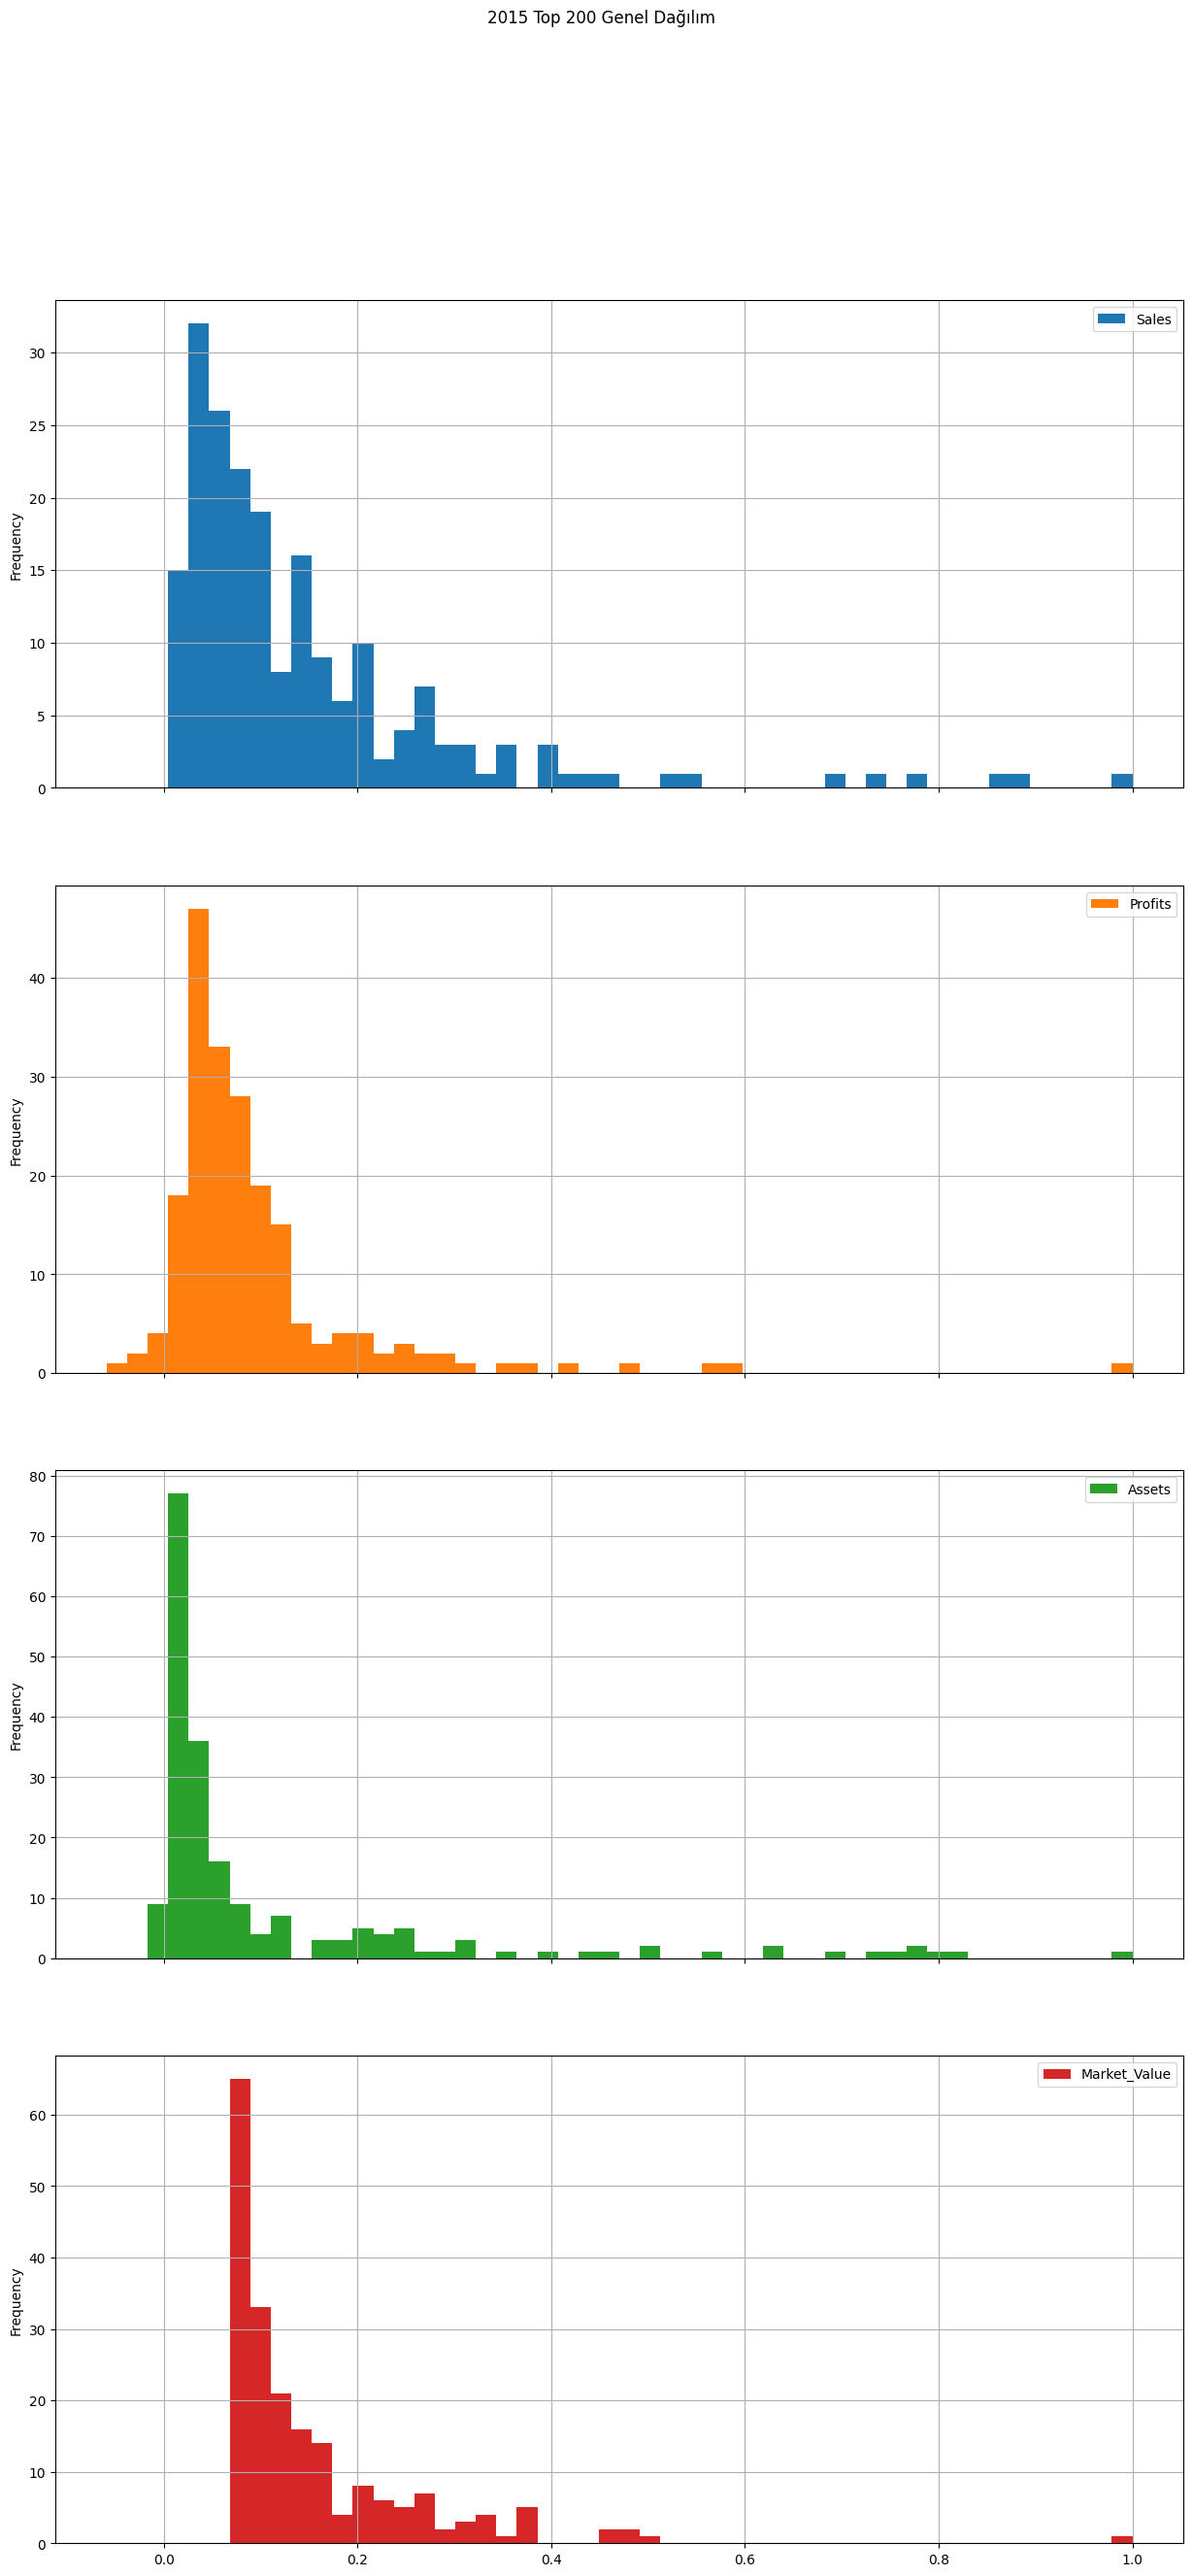

In [9]:
(
    df_15
    .drop(columns='Rank_nr')
    .select_dtypes('number')
    .apply(lambda x: x / x.abs().max(), axis=0)
    .plot(
        kind='hist', bins=50, subplots=True, grid=True, title="2015 Top 200 Genel Dağılım",
        sharex= True, sharey=False, legend=True,
        figsize=(15, 30)
    )
)

for ax in plt.gcf().axes:
    ax.legend(loc=1)

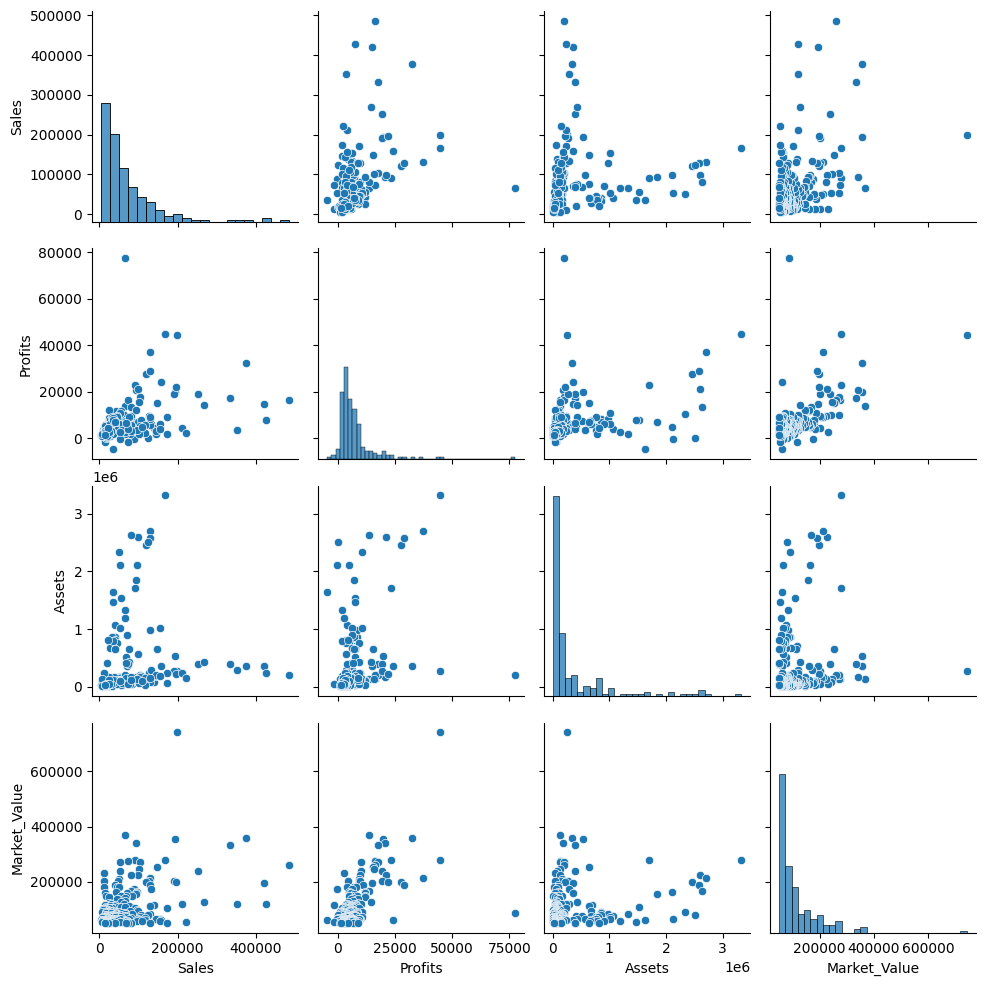

In [10]:
sns.pairplot(df_15.drop(columns='Rank_nr'))
plt.show()